# Raw High-card points from the deal
This notebook demonstrates how to determine the HCP points from mant decks and shows the stats. 



In [23]:
from Bridge.Deck import Deck
from Bridge.Scorers import SimpleHighCardValue

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

sns.set(font_scale=1.5)

## Make a deck and comute the HCP

In [2]:
d = Deck()
d.shuffle(num=3)
SimpleHighCardValue.getScores(d)

[9, 8, 12, 11]

## Collect up many decks and keep scores in a dataframe

In [18]:
NUM = 100000
scores = pd.DataFrame([SimpleHighCardValue.getScores(Deck(shuffle=3)) for i in range(NUM)])

In [19]:
scores.head()

,0,1,2,3
0,13,6,13,8
1,11,2,17,10
2,13,19,3,5
3,11,4,10,15
4,4,10,17,9


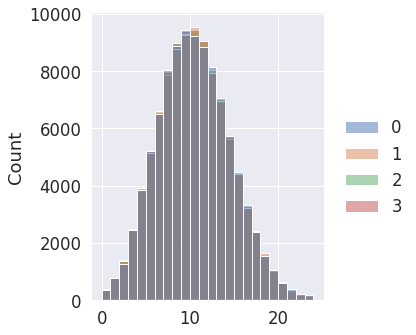

In [20]:
sns.displot(scores, bins=range(25))

### Fit the distribution

<AxesSubplot:xlabel='0', ylabel='Probability'>

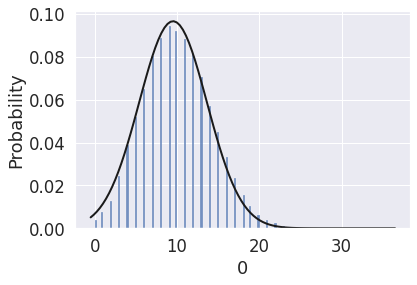

In [54]:
mu, std = stats.norm.fit(scores[0])

x = np.linspace(0, 37, 100)
p = stats.norm.pdf(x, mu, std)
ax = plt.plot(x-0.5, p, 'k', linewidth=2)
sns.histplot(scores[0], stat='probability')

In [55]:
print(f"The average dealt score is {mu:.0f} with a standard deviation of {std:.0f}")

The average dealt score is 10 with a standard deviation of 4


<AxesSubplot:xlabel='0', ylabel='Percent'>

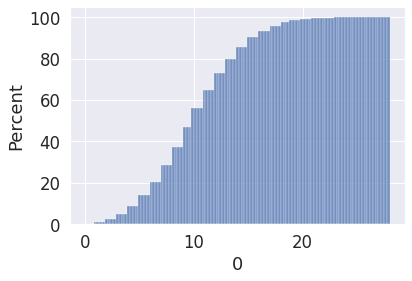

In [56]:
sns.histplot(scores[0], cumulative=True, stat='percent')

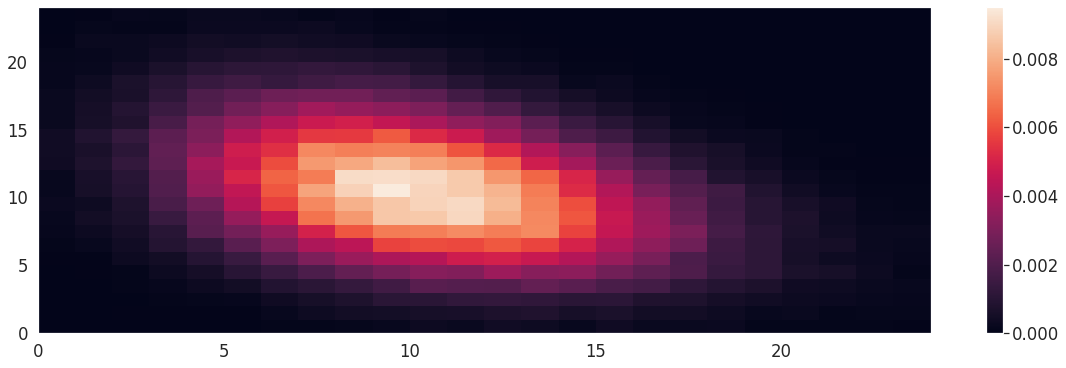

In [62]:
fig = plt.figure(figsize=(20,6))
plt.hist2d(scores[0], scores[2], bins=range(25), density=True);
plt.colorbar();

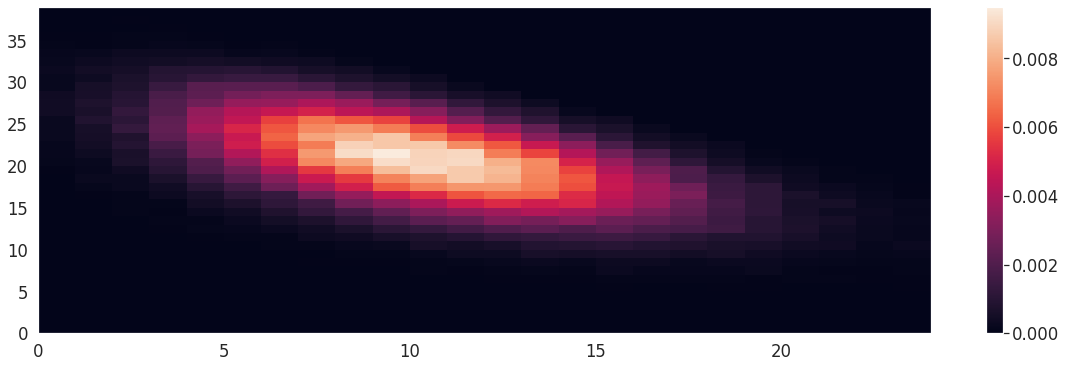

In [67]:
fig = plt.figure(figsize=(20,6))
plt.hist2d(scores[0], scores[1]+scores[3], bins=(range(25), range(40)), density=True);
plt.colorbar();

<AxesSubplot:>

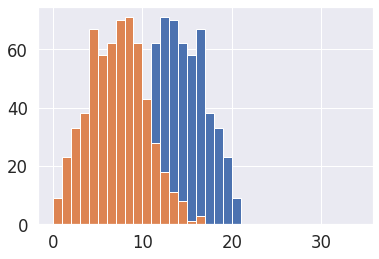

In [78]:
scores.loc[scores[0]==20, [1,3]].sum(axis=1).hist(bins=range(35))
